# Linear Regression Implementation
We can find normal equation and 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Generating random data

In [15]:
X = np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

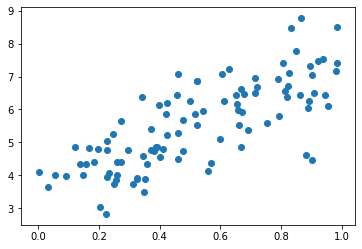

In [16]:
plt.scatter(X, Y)
#plt.axis([0, 2, 0, 10])
plt.show()

## The Normal Equation

In [18]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
theta_best

array([[3.60153499],
       [3.70784992]])

### Predict new values

In [20]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [21]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.60153499],
       [11.01723483]])

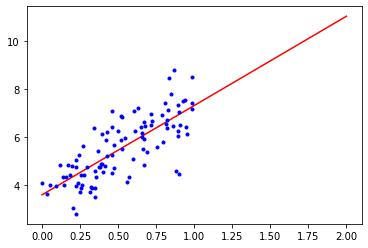

In [23]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, Y, "b.")
plt.show()

## Using the LinearLegression from sklearn

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lin_reg.intercept_, lin_reg.coef_

(array([3.60153499]), array([[3.70784992]]))

In [26]:
lin_reg.predict(X_new)

array([[ 3.60153499],
       [11.01723483]])

LinearRegression from sklearn is using the Normal Equation to find the best function representing the data (training).